In [46]:
import os
import json

from crewai import LLM, Agent, Task, Crew, Process
from dotenv import load_dotenv

from IPython.display import Image

# Configure LLMs and providers

In [11]:
SELECTED_MODEL="sonar-pro"
URL_PROVIDER="https://api.perplexity.ai/"

In [12]:
load_dotenv(override=True)

True

In [13]:
API_KEY = os.getenv("API_KEY")

In [14]:
def get_llm():
    return LLM(model=SELECTED_MODEL, 
               api_key=API_KEY, 
               base_url=URL_PROVIDER)

In [15]:
llm = get_llm()

# General structure of a Crew AI agent

1. Agents
2. Tasks
3. Crew

## 1. Agents

In [16]:
image_creator_agent = Agent(
    role="Senior image creator",
    goal="To generate high-quality image descriptions that align with the content of articles.",
    backstory="You have been analyzing articles for years and know how to create compelling images that capture the essence of the content and increase reader engagement. "
                "You are skilled in understanding the nuances of different topics and can generate image descriptions that are both relevant and engaging.",
    tools=[],
    verbose=True,
    llm=llm
    )

## 2. Tasks

In [27]:
image_creator_task = Task(
    name="",
    description="You will generate good quality image descriptions for an article. "
                "Depending on the topic and the length of the article you will decide the number of images. Always between 1 and 3. "
                "This is the article content: {article_content}",
    expected_output="""A list containing JSON objects, each one with 3 keys: 
                    'order' which contains an integer that indicates the order (1,2 ..) of the generated image. 
                    'previous_text': last 4 or 5 words where you decide to insert the image below, just for position reference. 
                    'description': a very detailed image description that can be used to create the image.""",
    context=[],
    agent=image_creator_agent
)

## 3. Crew

In [30]:
crew = Crew(agents=[image_creator_agent],
            tasks=[image_creator_task],
            process=Process.sequential,
            verbose=True)

Configure the crew, i.e. complete variables

In [ ]:
# URL: https://www.xataka.com/medicina-y-salud/cantidad-cafeina-bebidas-que-consumimos-a-diario-expuesta-este-grafico

article_content = \
"""
La cantidad de cafeína de las bebidas que consumimos a diario, expuesta en este gráfico
Alejandro Alcolea
5-6 minutos

La cafeína es una de las sustancias más consumidas en el mundo. Se estima que cerca del 80% de la población mundial consume cafeína a diario y, aunque el café es una importante fuente, también está presente en el té, el café, la yerba mate, las vainas de cacao o en la nuez de kola -ingrediente de la Coca-Cola original-. Sin embargo, también se puede producir de forma sintética para añadirla a refrescos, bebidas energéticas o suplementos.

Y en este gráfico elaborado por Visual Capitalist, podemos ver cuánta cafeína tienen las bebidas que consumimos constantemente.

Cafeína de bebidas

El gráfico. Elaborado con datos de EFSA (la Autoridad Europea de Seguridad Alimentaria, en castellano) tras encuestar a más de 66.500 personas de 22 países europeos, el gráfico es bastante autoexplicativo. En algunas publicaciones de este tipo se suele obviar la marca, pero lo realmente útil de este gráfico es que, directamente, se indica la cantidad de cafeína en bebidas comerciales como Monster, Red Bull o Prime (una marca creada por el polémico Logan Paul).

También es útil que se ofrecen tanto los miligramos de cafeína de las bebidas como la cantidad de líquido que consumimos, ya que así podemos calcular de forma más efectiva “cuántos Red Bull puedo tomar para tener una dosis segura”. Un Monster es lo que más cafeína tiene, pero también porque la muestra es de medio litro. Prime, con menos cantidad (330 ml), está cerca de la cafeína de un Monster con sus 140 mg. Y es curioso que la bebida que nos da alas tenga en un bote la misma cantidad que un espresso doble: 80 mg.

No me gusta el café, pero tras repasar lo que dice la ciencia he empezado a consumirlo diariamente

No sólo cafeína. Lo que ocurre con las bebidas energéticas es que, como la propia EFSA detalla, el estimulante que contienen no se limita a la cafeína. Aparte de ese compuesto, tienen otros ingredientes como la taurina o el D-gucorono-y-lactona. La taurina es un aminoácido que participa en el control del calcio celular y la función cardíaca, asociado con la mejora de la resistencia deportiva al permitir mantener altos esfuerzos durante más tiempo, reduciendo la fatiga.

El D-glucurono-y-lactona es un metabolito del glucurónico que ayuda en la síntesis de la vitamina C, y ambos son seguros por su rápida metabolización, pese a que pueden tener efectos segundarios como algunas molestias digestivas en consumos altos. Y si la cafeína, la taurina y el D-glucurono-γ-lactona fueran poco, al cóctel hay que añadir algo más perjudicial: enormes cantidades de azúcar en estas bebidas energéticas.

Consumo por edades. La EFSA ha creado una tabla que indica cuántos mg de cafeína consumimos a diario dependiendo de nuestra edad:

rango de edad
	

Consumo diario

A partir de 75 años
	

22-417 mg

Entre 65 y 75 años
	

23-362 mg

entre 18 y 65 años
	

37-319 mg

entre 10 y 18 años
	

0,4-1,4 mg/kg

entre 3 y 10 años
	

0,2-2,0 mg/kg

entre 12 y 36 meses
	

0-2,1 mg/kg

Entre los adultos, el café es la fuente más importante de cafeína, representando entre el 40% y el 94% de la ingesta total diaria. En Irlanda y Reino Unido, la cosa cambia, y esa fuente principal es el té, representando entre el 59% y el 57% de la ingesta, respectivamente. Entre los adolescentes, la principal fuente de cafeína es el chocolate (tanto en barra como en bebidas de cacao), seguido del café, las bebidas de cola y el té. Y de 10 años para abajo, el café desaparece y el chocolate sigue reinando, seguido del té y de las bebidas de cola.

Hubo un tiempo en que la Coca-Cola tenía 'cocaína'. Que ya no la tenga se debe a algo sorprendente: el racismo

Consumo seguro, pero con asteriscos. Una de las cuestiones que sigue preocupando a quien busca cuidarse es cuánta cafeína es mucha cafeína. Los 400 mg al día se han tomado como la medida universal para decir que es la cantidad “segura”, pero es algo que depende de varios factores. Por ejemplo, dosis únicas de cafeína de hasta 200 mg no presentan problemas de seguridad para la población adulta sana general.

Pero si eres una mujer y estás embarazada, esa cifra segura baja hasta los 200 mg al día, repartidos a lo largo de la jornada. Además, si se consumen dosis únicas de 100 mg antes de irnos a dormir, se puede alterar el patrón de calidad de sueño, pero es algo que no ocurre en todos los adultos.

Pero claro, todo depende de un término clave: población sana, ya que hay estudios que relacionan la cafeína con efectos negativos en fases de restricción crónica del sueño y, si bien se utiliza como estimulante en la práctica deportiva, sus efectos serán más o menos beneficiosos dependiendo del deporte que practiquemos o las decisiones que debamos tomar.
"""

In [29]:
crew_config = {"article_content": article_content}

## Launch execution

In [31]:
result = crew.kickoff(crew_config)

╭──────────────────────────────────────────── Crew Execution Started ─────────────────────────────────────────────╮
│                                                                                                                 │
│  Crew Execution Started                                                                                         │
│  Name: crew                                                                                                     │
│  ID: a58a143b-4ea9-424e-bd51-9c5a527e8cd6                                                                       │
│  Tool Args:                                                                                                     │
│                                                                                                                 │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭─────────────────────────────────────────────── 🤖 Agent Started ────────────────────────────────────────────────╮
│                                                                                                                 │
│  Agent: Senior image creator                                                                                    │
│                                                                                                                 │
│  Task: You will generate good quality image descriptions for an article. Depending on the topic and the length  │
│  of the article you will decide the number of images. Always between 1 and 3. This is the article content:      │
│  La cantidad de cafeína de las bebidas que consumimos a diario, expuesta en este gráfico                        │
│  Alejandro Alcolea                                                                                              │
│  5-6 minutos                                                                                                    │
│                                                                                                                 │
│  La cafeína es una de las sustancias más consumidas en el mundo. Se estima que cerca del 80% de la población    │
│  mundial consume cafeína a diario y, aunque el café es una importante fuente, también está presente en el té,   │
│  el café, la yerba mate, las vainas de cacao o en la nuez de kola -ingrediente de la Coca-Cola original-. Sin   │
│  embargo, también se puede producir de forma sintética para añadirla a refrescos, bebidas energéticas o         │
│  suplementos.                                                                                                   │
│                                                                                                                 │
│  Y en este gráfico elaborado por Visual Capitalist, podemos ver cuánta cafeína tienen las bebidas que           │
│  consumimos constantemente.                                                                                     │
│                                                                                                                 │
│  Cafeína de bebidas                                                                                             │
│                                                                                                                 │
│  El gráfico. Elaborado con datos de EFSA (la Autoridad Europea de Seguridad Alimentaria, en castellano) tras    │
│  encuestar a más de 66.500 personas de 22 países europeos, el gráfico es bastante autoexplicativo. En algunas   │
│  publicaciones de este tipo se suele obviar la marca, pero lo realmente útil de este gráfico es que,            │
│  directamente, se indica la cantidad de cafeína en bebidas comerciales como Monster, Red Bull o Prime (una      │
│  marca creada por el polémico Logan Paul).                                                                      │
│                                                                                                                 │
│  También es útil que se ofrecen tanto los miligramos de cafeína de las bebidas como la cantidad de líquido que  │
│  consumimos, ya que así podemos calcular de forma más efectiva “cuántos Red Bull puedo tomar para tener una     │
│  dosis segura”. Un Monster es lo que más cafeína tiene, pero también porque la muestra es de medio litro.       │
│  Prime, con menos cantidad (330 ml), está cerca de la cafeína de un Monster con sus 140 mg. Y es curioso que    │
│  la bebida que nos da alas tenga en un bote la misma cantidad que un espresso doble: 80 mg.                     │
│                                                                                                                 │
│  No me gusta el café, pero tras repasar lo que dice la ciencia he empezado a consumirlo diariamente             │
│                                                        

╭───────────────────────────────────────────── ✅ Agent Final Answer ─────────────────────────────────────────────╮
│                                                                                                                 │
│  Agent: Senior image creator                                                                                    │
│                                                                                                                 │
│  Final Answer:                                                                                                  │
│  [                                                                                                              │
│    {                                                                                                            │
│      "order": 1,                                                                                                │
│      "previous_text": "en este gráfico elaborado por Visual Capitalist, podemos ver cuánta cafeína tienen las   │
│  bebidas que consumimos constantemente.",                                                                       │
│      "description": "A colorful infographic-style image showing a comparative bar chart of caffeine content in  │
│  popular beverages. Each bar represents a different beverage: Monster, Red Bull, Prime, espresso double,        │
│  Coca-Cola, and tea. Next to each bar, there is a label showing the exact milligrams of caffeine and the        │
│  volume of liquid (e.g., 500 ml, 330 ml, 250 ml). Brands are clearly indicated on cans/cups with their logos.   │
│  Above the chart, a header reads 'Contenido de cafeína por bebida'. The background suggests a modern kitchen    │
│  counter, with the actual drinks (energy cans, coffee cup, soda bottle, tea mug) placed beside their            │
│  respective bars for visual reference. Light glow effects highlight the highest caffeine bars, and small icons  │
│  (coffee bean, energy bolt, chocolate bar) reinforce the source of caffeine for each beverage."                 │
│    },                                                                                                           │
│    {                                                                                                            │
│      "order": 2,                                                                                                │
│      "previous_text": "No sólo cafeína. Lo que ocurre con las bebidas energéticas es que, como la propia EFSA   │
│  detalla, el estimulante que contienen no se limita a la cafeína.",                                             │
│      "description": "A detailed cross-section illustration of an energy drink can with exploded labels for      │
│  ingredients. The can is split open to show molecules or icons for caffeine, taurine (represented by a          │
│  chemical structure or small dumbbells), D-glucurono-y-lactona (depicted as a vitamin C capsule or molecular    │
│  ring), and a large pile of sugar cubes spilling out. Each ingredient is connected to a written label           │
│  explaining its effect: 'Estimulante', 'Mejora de resistencia', 'Síntesis de vitamina C', 'Alto contenido en    │
│  azúcar'. An explanatory sidebar visually highlights possible effects: a runner symbol (resistance), a stomach  │
│  icon (digestive effects), and a warning triangle near the sugar cubes. The style is scientific but             │
│  approachable."                                                                                                 │
│    },                                                                                                           │
│    {                                                                                                            │
│      "order": 3,                                                                                                │
│      "previous_text": "La EFSA ha creado una tabla que 

╭──────────────────────────────────────────────── Task Completion ────────────────────────────────────────────────╮
│                                                                                                                 │
│  Task Completed                                                                                                 │
│  Name: b3b8a6e4-f93a-4567-93de-955f86ab7697                                                                     │
│  Agent: Senior image creator                                                                                    │
│  Tool Args:                                                                                                     │
│                                                                                                                 │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭──────────────────────────────────────────────── Crew Completion ────────────────────────────────────────────────╮
│                                                                                                                 │
│  Crew Execution Completed                                                                                       │
│  Name: crew                                                                                                     │
│  ID: a58a143b-4ea9-424e-bd51-9c5a527e8cd6                                                                       │
│  Tool Args:                                                                                                     │
│  Final Output: [                                                                                                │
│    {                                                                                                            │
│      "order": 1,                                                                                                │
│      "previous_text": "en este gráfico elaborado por Visual Capitalist, podemos ver cuánta cafeína tienen las   │
│  bebidas que consumimos constantemente.",                                                                       │
│      "description": "A colorful infographic-style image showing a comparative bar chart of caffeine content in  │
│  popular beverages. Each bar represents a different beverage: Monster, Red Bull, Prime, espresso double,        │
│  Coca-Cola, and tea. Next to each bar, there is a label showing the exact milligrams of caffeine and the        │
│  volume of liquid (e.g., 500 ml, 330 ml, 250 ml). Brands are clearly indicated on cans/cups with their logos.   │
│  Above the chart, a header reads 'Contenido de cafeína por bebida'. The background suggests a modern kitchen    │
│  counter, with the actual drinks (energy cans, coffee cup, soda bottle, tea mug) placed beside their            │
│  respective bars for visual reference. Light glow effects highlight the highest caffeine bars, and small icons  │
│  (coffee bean, energy bolt, chocolate bar) reinforce the source of caffeine for each beverage."                 │
│    },                                                                                                           │
│    {                                                                                                            │
│      "order": 2,                                                                                                │
│      "previous_text": "No sólo cafeína. Lo que ocurre con las bebidas energéticas es que, como la propia EFSA   │
│  detalla, el estimulante que contienen no se limita a la cafeína.",                                             │
│      "description": "A detailed cross-section illustration of an energy drink can with exploded labels for      │
│  ingredients. The can is split open to show molecules or icons for caffeine, taurine (represented by a          │
│  chemical structure or small dumbbells), D-glucurono-y-lactona (depicted as a vitamin C capsule or molecular    │
│  ring), and a large pile of sugar cubes spilling out. Each ingredient is connected to a written label           │
│  explaining its effect: 'Estimulante', 'Mejora de resistencia', 'Síntesis de vitamina C', 'Alto contenido en    │
│  azúcar'. An explanatory sidebar visually highlights possible effects: a runner symbol (resistance), a stomach  │
│  icon (digestive effects), and a warning triangle near the sugar cubes. The style is scientific but             │
│  approachable."                                                                                                 │
│    },                                                                                                           │
│    {                                                                                                            │
│      "order": 3,                                      

## Results

In [34]:
print(result.raw)

[
  {
    "order": 1,
    "previous_text": "en este gráfico elaborado por Visual Capitalist, podemos ver cuánta cafeína tienen las bebidas que consumimos constantemente.",
    "description": "A colorful infographic-style image showing a comparative bar chart of caffeine content in popular beverages. Each bar represents a different beverage: Monster, Red Bull, Prime, espresso double, Coca-Cola, and tea. Next to each bar, there is a label showing the exact milligrams of caffeine and the volume of liquid (e.g., 500 ml, 330 ml, 250 ml). Brands are clearly indicated on cans/cups with their logos. Above the chart, a header reads 'Contenido de cafeína por bebida'. The background suggests a modern kitchen counter, with the actual drinks (energy cans, coffee cup, soda bottle, tea mug) placed beside their respective bars for visual reference. Light glow effects highlight the highest caffeine bars, and small icons (coffee bean, energy bolt, chocolate bar) reinforce the source of caffeine for each

## Costs

In [32]:
crew.usage_metrics

UsageMetrics(total_tokens=2320, prompt_tokens=1641, cached_prompt_tokens=0, completion_tokens=679, successful_requests=1)

# Let's visualize the results

https://aistudio.google.com

Model: Nano Banana

In [47]:
result_json = json.loads(result.raw)

## Image 1

In [49]:
print(result_json[0]['description'])

A colorful infographic-style image showing a comparative bar chart of caffeine content in popular beverages. Each bar represents a different beverage: Monster, Red Bull, Prime, espresso double, Coca-Cola, and tea. Next to each bar, there is a label showing the exact milligrams of caffeine and the volume of liquid (e.g., 500 ml, 330 ml, 250 ml). Brands are clearly indicated on cans/cups with their logos. Above the chart, a header reads 'Contenido de cafeína por bebida'. The background suggests a modern kitchen counter, with the actual drinks (energy cans, coffee cup, soda bottle, tea mug) placed beside their respective bars for visual reference. Light glow effects highlight the highest caffeine bars, and small icons (coffee bean, energy bolt, chocolate bar) reinforce the source of caffeine for each beverage.


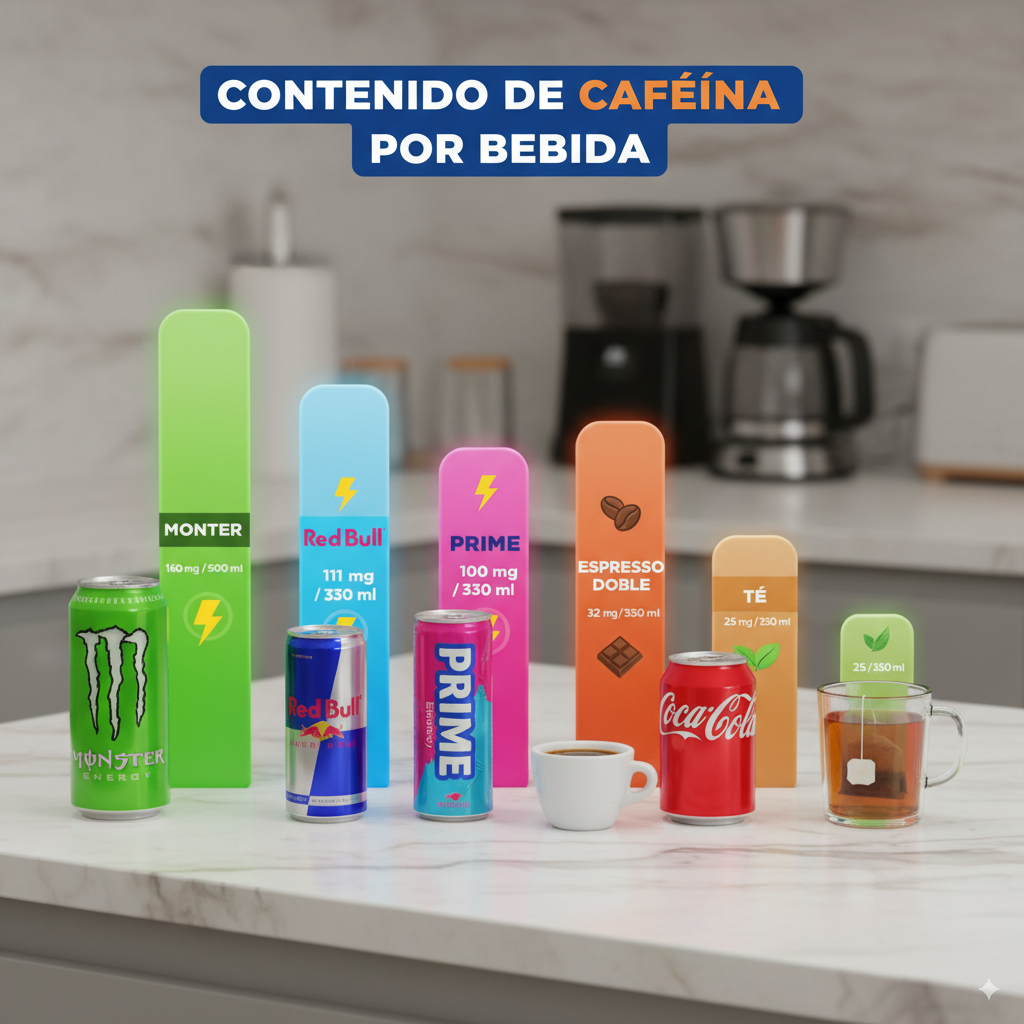

In [60]:
Image(filename="../../resources/generated1.png", retina=True)

## Image 2

In [50]:
print(result_json[1]['description'])

A detailed cross-section illustration of an energy drink can with exploded labels for ingredients. The can is split open to show molecules or icons for caffeine, taurine (represented by a chemical structure or small dumbbells), D-glucurono-y-lactona (depicted as a vitamin C capsule or molecular ring), and a large pile of sugar cubes spilling out. Each ingredient is connected to a written label explaining its effect: 'Estimulante', 'Mejora de resistencia', 'Síntesis de vitamina C', 'Alto contenido en azúcar'. An explanatory sidebar visually highlights possible effects: a runner symbol (resistance), a stomach icon (digestive effects), and a warning triangle near the sugar cubes. The style is scientific but approachable.


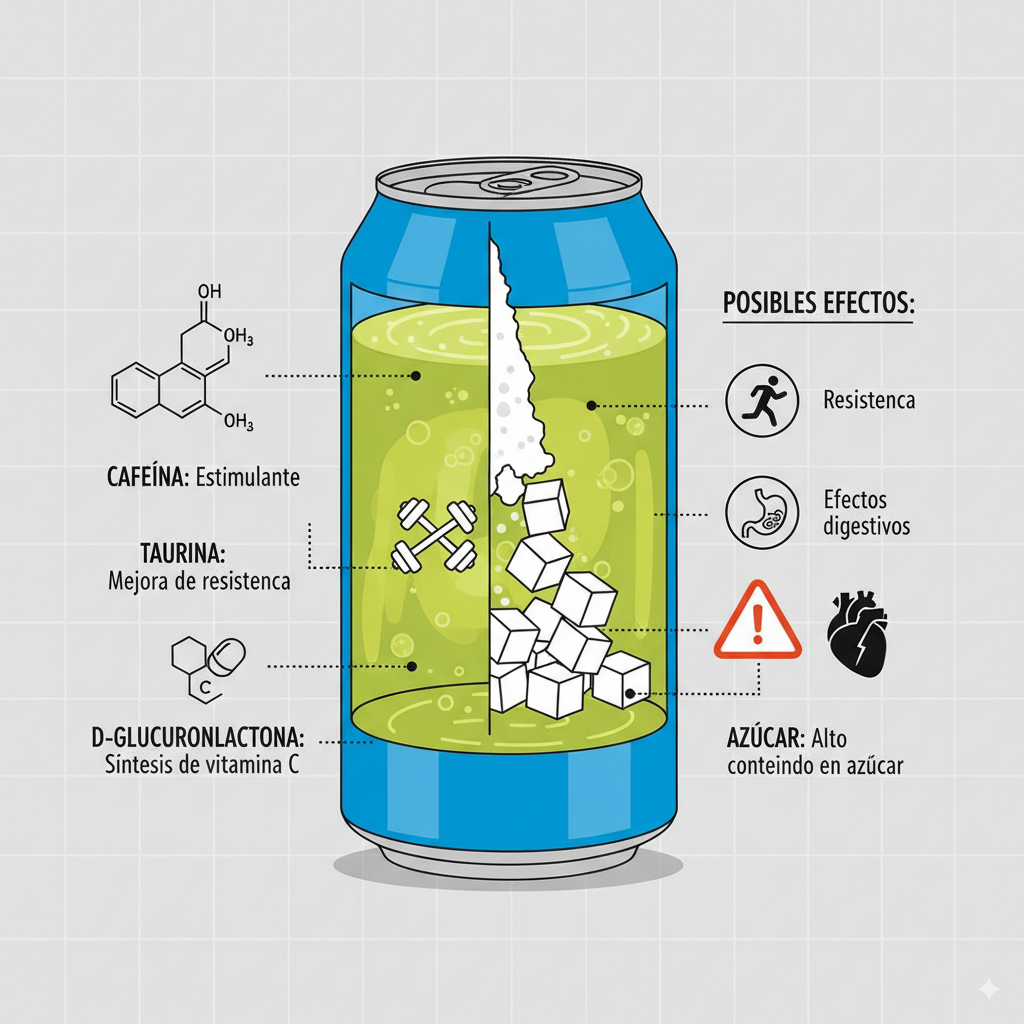

In [58]:
Image(filename="../../resources/generated2.png", retina=True)

## Image 3

In [59]:
print(result_json[2]['description'])

A multi-generational family portrait-style tableau where each character represents a different age group (elderly, middle-aged adults, young adults, teenagers, children, toddlers). Above their heads, floating info bubbles display corresponding caffeine consumption ranges as per the provided table (e.g., '22–417 mg' for 75+, '0.4–1.4 mg/kg' for 10–18 years). Each person holds their principal caffeine source: older adults have coffee cups, young adults a mix of coffee and tea, teenagers sipping chocolate drinks or cola, children with chocolate bars or small soda bottles. The background has a simple graph overlay or faded table showing the age vs. caffeine consumption. Expressions and props highlight the generational habits: elders chat over coffee, teens in sporty clothes, younger kids playing with chocolate.


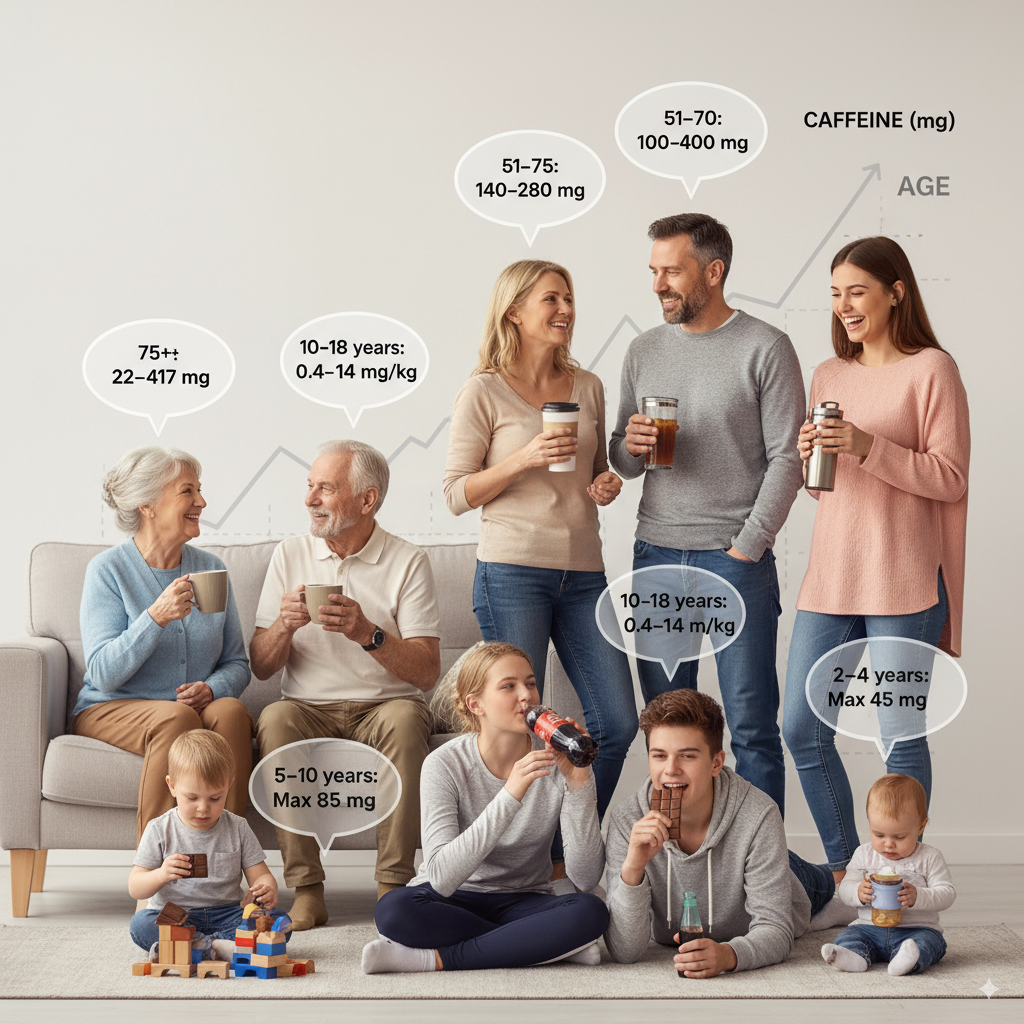

In [54]:
Image(filename="../../resources/generated3.png", retina=True)

# Improvements

- Images:
  - Less charts, less scientific, more companion, illustration. 
  - Tailored to the audience (topic, age, country) and the device (mobile, computer).
  
- Why manual connection?
  - Given a URL extract the text
  - Given a image description, call an API to create the image and retrieve it.
  - Instead of manually inserting the image, generate the final document with images inserted in the correct place


Key takeaways

- **Integration is the key my friend!!**
- Robustness in production is extremely important.
  - LLM may hallucinate (or troll you as I prefer to say)
  - 3º party services can behave in different ways as you expect (read documentation cough cough): image models may block specific brands or celebrities